In [1]:
import numpy as np
import pandas as pd

In [2]:
survey_data = pd.read_csv("HappinessData-1.csv")
column_to_move = survey_data.pop("Unhappy/Happy")
survey_data.insert(len(survey_data.columns), "Unhappy/Happy", column_to_move)

In [3]:
survey_data = survey_data.dropna()

In [4]:
print(survey_data)

     City Services Availability  Housing Cost  Quality of schools  \
0                             5             3                 3.0   
1                             5             3                 3.0   
2                             4             3                 3.0   
3                             4             1                 3.0   
4                             3             2                 4.0   
..                          ...           ...                 ...   
135                           4             3                 3.0   
136                           3             4                 3.0   
137                           3             3                 3.0   
138                           3             3                 1.0   
139                           3             3                 1.0   

     Community trust in local police  Community Maintenance  \
0                                3.0                      5   
1                                3.0         

In [5]:
correlation = survey_data.corr()

In [6]:
print(correlation)

#Duc's observation:
#The highest correlation between the features and unhappy/happy is 
#city services availability, community maintenance, 
#and availability of community room.

                                 City Services Availability  Housing Cost  \
City Services Availability                         1.000000      0.083581   
Housing Cost                                       0.083581      1.000000   
Quality of schools                                 0.310790      0.179804   
Community trust in local police                    0.102089      0.095191   
Community Maintenance                              0.413512     -0.002696   
Availability of Community Room                     0.425844      0.022377   
Unhappy/Happy                                      0.330374      0.024465   

                                 Quality of schools  \
City Services Availability                 0.310790   
Housing Cost                               0.179804   
Quality of schools                         1.000000   
Community trust in local police            0.273441   
Community Maintenance                      0.315938   
Availability of Community Room             0.193791  

In [7]:
#KNN using sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [8]:
X = survey_data.iloc[:, :-1].values
y = survey_data.iloc[:, -1].values

In [9]:
print(X)
print(y)

[[5 5 3]
 [5 5 3]
 [4 4 4]
 [4 4 5]
 [3 4 5]
 [4 1 4]
 [4 4 4]
 [5 4 5]
 [5 4 5]
 [5 2 5]
 [4 2 4]
 [4 4 3]
 [5 3 3]
 [4 2 4]
 [5 4 5]
 [4 2 4]
 [3 3 5]
 [5 4 5]
 [1 1 4]
 [5 5 3]
 [5 4 4]
 [5 4 4]
 [5 4 4]
 [5 4 5]
 [5 4 5]
 [4 3 4]
 [5 3 5]
 [4 3 4]
 [5 2 4]
 [4 2 5]
 [4 3 5]
 [5 5 5]
 [5 5 5]
 [5 5 5]
 [4 4 4]
 [4 4 4]
 [3 4 3]
 [4 4 4]
 [5 5 5]
 [5 5 5]
 [4 4 5]
 [4 3 4]
 [3 1 4]
 [4 1 3]
 [4 2 4]
 [5 2 5]
 [5 3 3]
 [5 5 5]
 [3 4 4]
 [4 2 4]
 [5 5 5]
 [5 2 5]
 [5 5 5]
 [4 4 4]
 [3 3 4]
 [4 4 4]
 [5 4 4]
 [4 2 4]
 [5 4 5]
 [5 5 5]
 [4 4 3]
 [5 4 5]
 [5 3 5]
 [3 2 3]
 [3 5 4]
 [5 5 5]
 [5 5 4]
 [5 4 5]
 [5 3 4]
 [5 4 5]
 [3 1 2]
 [5 5 5]
 [4 3 3]
 [5 5 4]
 [4 3 3]
 [3 4 4]
 [5 5 5]
 [5 4 5]
 [3 3 1]
 [5 4 3]
 [5 3 5]
 [4 3 4]
 [3 3 3]
 [4 3 5]
 [5 5 5]
 [4 4 4]
 [5 5 5]
 [4 4 4]
 [5 5 5]
 [5 4 4]
 [5 2 3]
 [5 4 5]
 [5 4 4]
 [3 5 4]
 [4 3 4]
 [5 4 5]
 [5 4 5]
 [5 5 5]
 [3 1 3]
 [5 5 5]
 [4 4 4]
 [5 5 1]
 [4 1 3]
 [5 4 3]
 [5 3 5]
 [5 2 5]
 [5 4 5]
 [4 4 5]
 [5 5 5]
 [3 2 4]
 [3 4 3]
 

In [10]:
#Seperate test set and training set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [11]:
print(X_train)
print(y_train)

[[5 5 5]
 [3 5 4]
 [4 2 4]
 [5 5 5]
 [4 2 4]
 [5 4 5]
 [4 3 3]
 [5 5 5]
 [5 3 5]
 [5 4 5]
 [4 4 5]
 [5 2 5]
 [5 5 5]
 [4 3 4]
 [3 2 4]
 [5 3 3]
 [3 2 3]
 [5 5 1]
 [5 5 5]
 [5 4 4]
 [5 3 5]
 [3 3 4]
 [5 4 5]
 [5 4 5]
 [4 3 5]
 [5 5 5]
 [5 4 4]
 [5 4 5]
 [5 4 5]
 [4 5 4]
 [3 4 3]
 [5 4 5]
 [5 4 5]
 [5 4 4]
 [5 3 5]
 [5 5 5]
 [4 4 4]
 [3 2 3]
 [4 1 4]
 [5 4 5]
 [3 3 3]
 [5 5 5]
 [5 5 5]
 [5 5 5]
 [4 2 4]
 [3 5 4]
 [5 5 5]
 [4 5 5]
 [3 4 4]
 [5 2 4]
 [4 4 4]
 [4 3 5]
 [4 4 3]
 [5 5 5]
 [4 3 4]
 [4 4 4]
 [3 1 2]
 [4 2 5]
 [5 4 5]
 [4 4 4]
 [5 5 5]
 [3 1 4]
 [3 4 4]
 [4 4 4]
 [5 2 3]
 [5 3 4]
 [4 4 4]
 [5 4 5]
 [5 3 3]
 [4 4 4]
 [5 4 5]
 [4 3 4]
 [4 4 5]
 [3 3 5]
 [4 4 3]
 [5 5 3]
 [4 4 4]
 [3 5 5]
 [5 5 5]
 [5 2 5]
 [4 4 5]
 [3 3 4]
 [5 4 5]
 [4 4 4]
 [5 2 4]
 [5 3 5]
 [4 4 4]
 [3 3 1]
 [5 4 5]
 [5 5 3]
 [1 1 4]
 [4 2 4]
 [3 3 4]
 [5 5 5]
 [5 4 5]
 [5 5 5]
 [5 4 4]
 [5 4 4]
 [5 4 5]
 [3 2 3]
 [4 1 3]
 [5 2 5]
 [3 4 5]
 [4 3 4]
 [5 5 5]
 [5 5 5]
 [5 4 3]
 [5 3 5]]
[1 0 1 0 0 1 1 1 1 1 1 1 1 

In [12]:
print(X_test)
print(y_test)

[[5 4 5]
 [4 3 3]
 [4 3 4]
 [3 4 4]
 [5 3 5]
 [5 5 4]
 [3 1 3]
 [5 4 5]
 [5 4 5]
 [5 2 5]
 [5 5 3]
 [5 4 3]
 [4 2 4]
 [5 5 5]
 [4 4 3]
 [3 1 3]
 [5 5 4]
 [4 4 4]
 [3 4 3]
 [4 3 4]
 [4 1 3]
 [4 2 4]
 [5 3 5]
 [5 5 5]
 [4 4 4]
 [4 4 3]
 [5 4 4]
 [4 4 4]]
[1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1]


In [13]:
#Sklearn's KNN algorithm with 5 neighbors
classifier_default = KNeighborsClassifier(n_neighbors=5)
classifier_default.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_default_pred = classifier_default.predict(X_test)
score_default = metrics.accuracy_score(y_test, y_default_pred)

In [15]:
#Classification Report
classification_report_default = metrics.classification_report(y_test, y_default_pred)
print(classification_report_default)

              precision    recall  f1-score   support

           0       0.59      0.91      0.71        11
           1       0.91      0.59      0.71        17

    accuracy                           0.71        28
   macro avg       0.75      0.75      0.71        28
weighted avg       0.78      0.71      0.71        28



In [16]:
#Finding the perfect numbers of neighbors for sklearn's KNN algorithm
k_range = range(1, 40)
errors = {}
errors_list = []

In [17]:
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    errors[k] = 1.0 - metrics.accuracy_score(y_test,y_pred)
    errors_list.append(1.0 - metrics.accuracy_score(y_test,y_pred))

In [18]:
#Plot the accuracy values for sklearn's KNN algorithm with the range of [1, 40]
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error Rate')

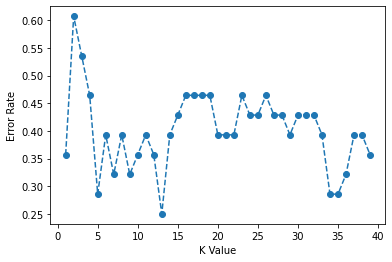

In [19]:
plt.plot(k_range,errors_list, linestyle='dashed', marker='o')
plt.xlabel("K Value")
plt.ylabel("Error Rate")

In [1]:
#Predicting with custom KNN and euclidean distance
from duc_knn import KNN
from duc_distance import euclidean_distance